In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



In [4]:
# Step 1: Load the MNIST dataset
print("Downloading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.int8)
print("Dataset loaded successfully!")

# Step 2: Filter only digits 0 and 1
mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask]



C:\Users\user\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dataset loaded successfully!


In [5]:
# Step 3: Show class distribution
unique, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for cls, cnt in zip(unique, counts):
    print(f"Class {cls}: {cnt} samples")

# Step 4: Normalize pixel values (0–255 → 0–1)
X = X / 255.0





Class distribution:
Class 0: 6903 samples
Class 1: 7877 samples


In [6]:
# Step 5: Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Step 6: Train Logistic Regression
print("\nTraining Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model training completed!")




Training set size: 11824
Test set size: 2956

Training Logistic Regression model...
Model training completed!



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00      1575

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956

Confusion Matrix:
[[1380    1]
 [   2 1573]]


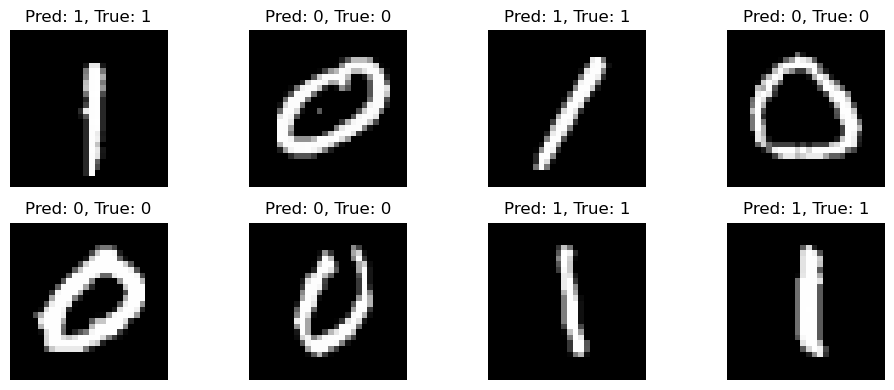

In [7]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Visualize some predictions
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()